# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

Extracting data..loading the data called : probe/data_cache/data_data
Data is of shape : (81920, 576) - done in 0.69s.
No cache found probe/data_cache/HULK_homeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   0s,  0.0mn)
Iteration  410 /   4096 (elapsed time:  13s,  0.0mn)
Iteration  820 /   4096 (elapsed time:  25s,  0.0mn)
Iteration  1230 /   4096 (elapsed time:  37s,  0.0mn)
Iteration  1640 /   4096 (elapsed time:  49s,  0.0mn)
Iteration  2050 /   4096 (elapsed time:  61s,  1.0mn)
Iteration  2460 /   4096 (elapsed time:  72s,  1.0mn)
Iteration  2870 /   4096 (elapsed time:  85s,  1.0mn)
Iteration  3280 /   4096 (elapsed time:  97s,  1.0mn)
Iteration  3690 /   4096 (elapsed time:  111s,  1.0mn)
Learning code... done (total time:  123s,  2.1mn)
done in 123.73s.
No cache found probe/data_cache/HULK_homeo_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp done in 11.18s.
loading the code called : pr

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


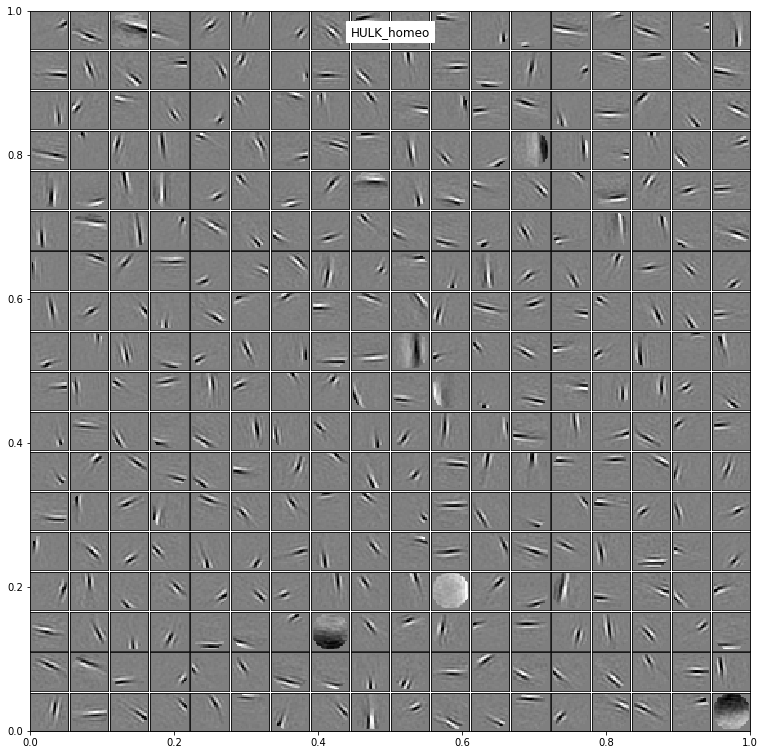

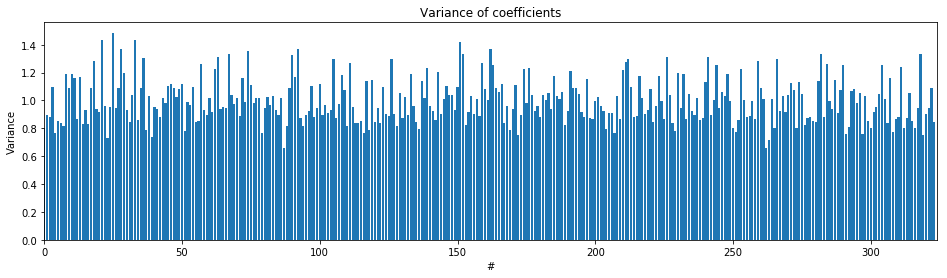

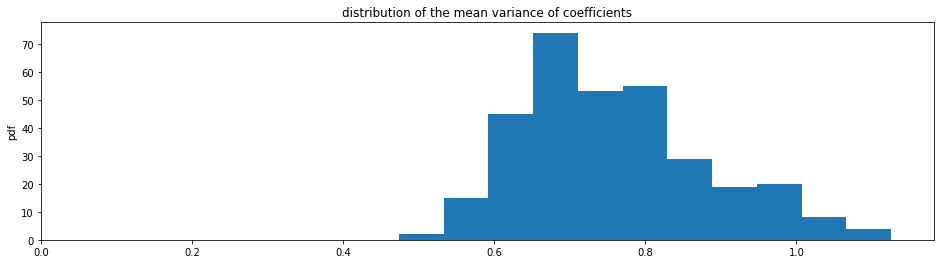

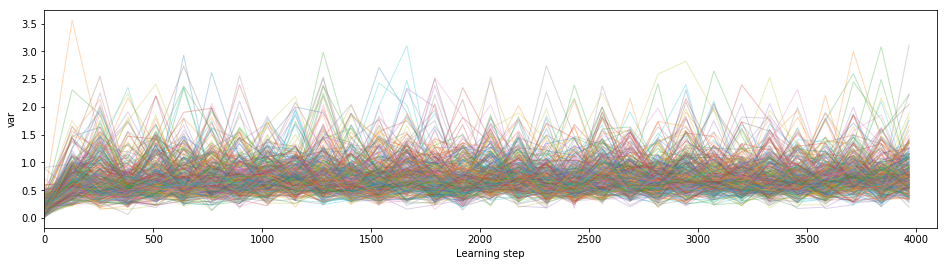

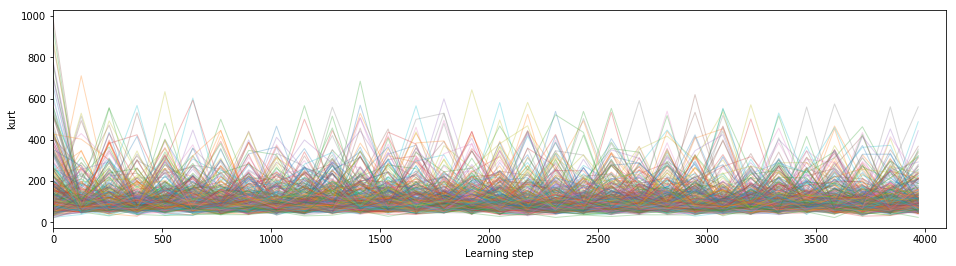

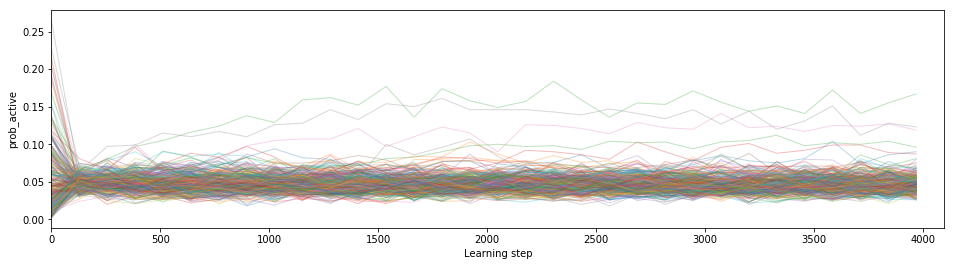

In [4]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
opts= dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, data_cache='probe/data_cache', datapath='probe/database')
shl = SHL(**opts)
tag = 'HULK'
data = shl.get_data(matname='data')
dico = shl.learn_dico(data=data, matname=tag + '_homeo', list_figures=list_figures)   

### control: learning without homeostasis

During the learning, to avoid divergence, the norm of the filters is shunted to $1$.

No cache found probe/data_cache/HULK_nohomeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   0s,  0.0mn)
Iteration  410 /   4096 (elapsed time:  12s,  0.0mn)
Iteration  820 /   4096 (elapsed time:  25s,  0.0mn)
Iteration  1230 /   4096 (elapsed time:  37s,  0.0mn)
Iteration  1640 /   4096 (elapsed time:  48s,  0.0mn)
Iteration  2050 /   4096 (elapsed time:  60s,  1.0mn)
Iteration  2460 /   4096 (elapsed time:  72s,  1.0mn)
Iteration  2870 /   4096 (elapsed time:  84s,  1.0mn)
Iteration  3280 /   4096 (elapsed time:  96s,  1.0mn)
Iteration  3690 /   4096 (elapsed time:  107s,  1.0mn)
Learning code... done (total time:  119s,  2.0mn)
done in 119.67s.
No cache found probe/data_cache/HULK_nohomeo_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp done in 10.64s.
loading the code called : probe/data_cache/HULK_nohomeo_coding.npy


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


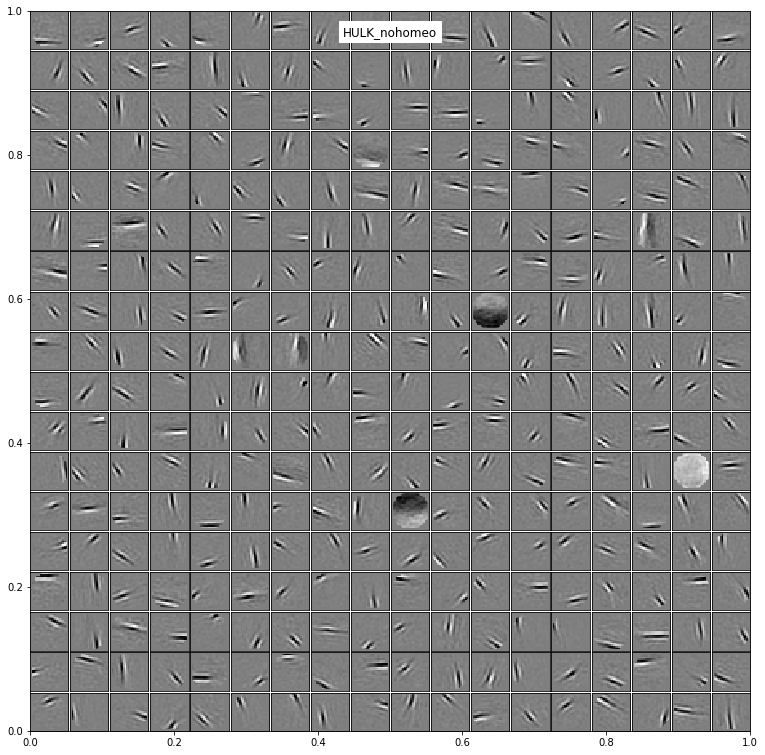

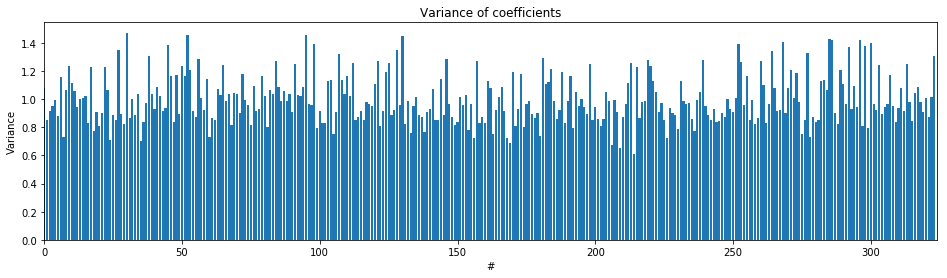

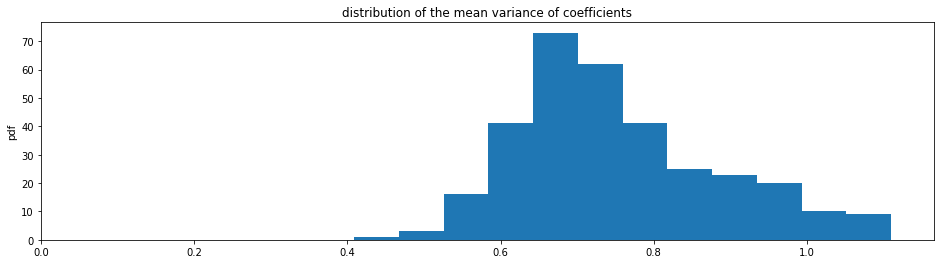

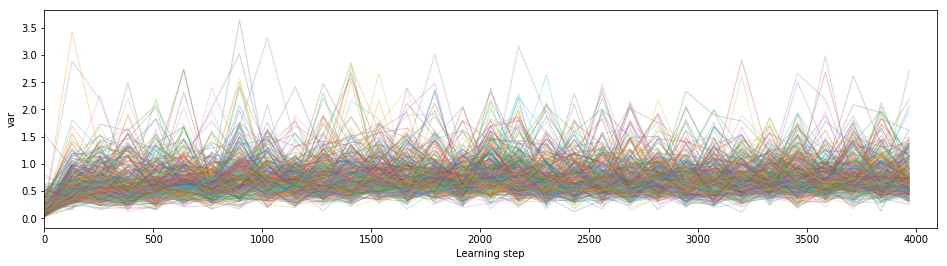

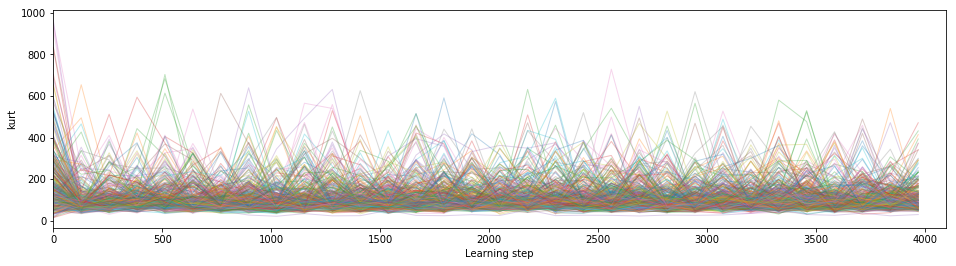

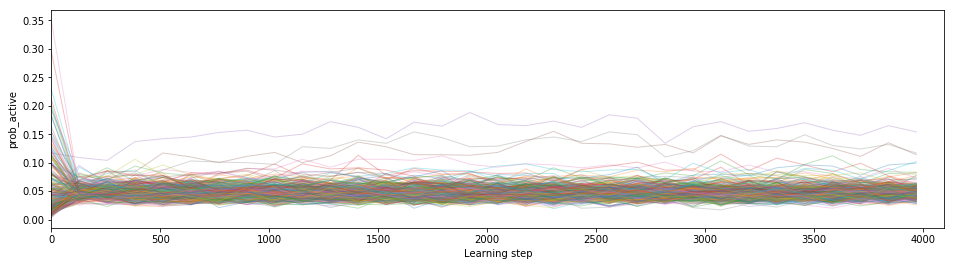

In [5]:
shl = SHL(homeo_method='None', **opts)
matname = tag + '_nohomeo'
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures) 

# Sparse Hebbian Learning : reproducing SparseNet

If we test the convergence of SparseNet as a function of different learning parameters, it shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

See :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the ``scikit-learn`` package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

## Version used

In [6]:
!rm -fr probe/data_cache/{tag}*

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.3.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
Wed Jan 10 18:55:02 2018 CET